In [1]:
!pip install astropy scikit-learn matplotlib numpy opencv-python

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
from google.colab import files

# Step 2: Upload the CSV file from your computer
uploaded = files.upload()  # This will open a file dialog to choose your file

Saving planet0_00226_1250.fits to planet0_00226_1250.fits
Saving planet1_00490_1250.fits to planet1_00490_1250.fits
Saving planet2_00154_1250.fits to planet2_00154_1250.fits
Saving planet2_00308_1250.fits to planet2_00308_1250.fits
Saving planet2_00548_1250.fits to planet2_00548_1250.fits
Saving planet2_00708_1250.fits to planet2_00708_1250.fits
Saving planet3_00078_1250.fits to planet3_00078_1250.fits
Saving planet3_00654_1250.fits to planet3_00654_1250.fits
Saving planet3_00806_1250.fits to planet3_00806_1250.fits
Saving planet3_00896_1250.fits to planet3_00896_1250.fits
Saving planet4_00442_1250.fits to planet4_00442_1250.fits
Saving planet5_00354_1250.fits to planet5_00354_1250.fits
Saving planet5_00482_1250.fits to planet5_00482_1250.fits
Saving planet5_00882_1250.fits to planet5_00882_1250.fits
Saving planet6_00370_1250.fits to planet6_00370_1250.fits
Saving planet6_00566_1250.fits to planet6_00566_1250.fits
Saving planet6_00638_1250.fits to planet6_00638_1250.fits
Saving planet6

In [6]:
from google.colab import files
uploaded = files.upload()  # Upload your continuum_data_subset.zip

Saving planet0_00226_1250.fits to planet0_00226_1250 (1).fits


In [8]:
from astropy.io import fits

# Example: Read the first .fits file
fits_file_path = "/content/planet0_00226_1250.fits"
hdul = fits.open(fits_file_path)

# Check what's inside
hdul.info()

# View data (e.g., image array)
data = hdul[0].data
print(data.shape)

# Close after reading
hdul.close()


Filename: /content/planet0_00226_1250.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (600, 600, 1, 1, 4)   float32   
  1                1 ImageHDU        10   (4, 1, 1, 2)   float32   
  2                1 ImageHDU         9   (4, 1, 1)   float32   
  3                1 ImageHDU         8   (3, 4)   float32   
(4, 1, 1, 600, 600)


In [9]:
from astropy.io import fits

# Load the FITS file
file_path = "/content/planet0_00226_1250.fits"
hdul = fits.open(file_path)

# See the structure
hdul.info()

# Extract data from Primary HDU (usually index 0)
primary_data = hdul[0].data

# Print shape of the primary data
print("Primary HDU shape:", primary_data.shape)

#  Optional: Remove extra singleton dimensions
import numpy as np
image_data = np.squeeze(primary_data)
print("Cleaned image shape:", image_data.shape)

# Always close after reading
hdul.close()


Filename: /content/planet0_00226_1250.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (600, 600, 1, 1, 4)   float32   
  1                1 ImageHDU        10   (4, 1, 1, 2)   float32   
  2                1 ImageHDU         9   (4, 1, 1)   float32   
  3                1 ImageHDU         8   (3, 4)   float32   
Primary HDU shape: (4, 1, 1, 600, 600)
Cleaned image shape: (4, 600, 600)


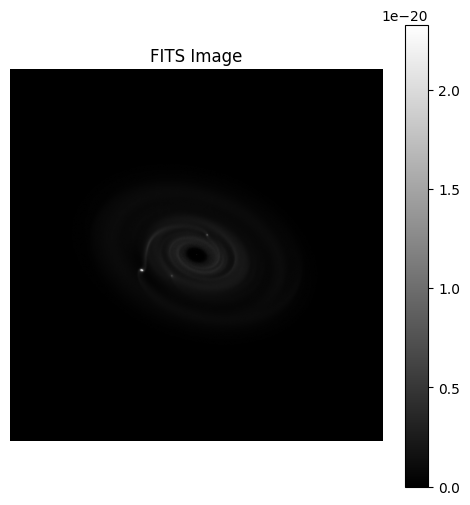

In [10]:
import matplotlib.pyplot as plt

# Display the FITS image
plt.figure(figsize=(6, 6))
plt.imshow(image_data[0], cmap='gray')  # Assuming you want the first image in stack
plt.title("FITS Image")
plt.axis('off')
plt.colorbar()
plt.show()

In [12]:
import numpy as np

mean_val = np.mean(image_data)
max_val = np.max(image_data)
print(f"Mean: {mean_val:.3e}, Max: {max_val:.3e}")

Mean: 5.588e-23, Max: 2.330e-20


In [14]:
normalized_image = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))

In [15]:
from astropy.io import fits

hdu = fits.PrimaryHDU(image_data)
hdu.writeto("cleaned_output.fits", overwrite=True)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


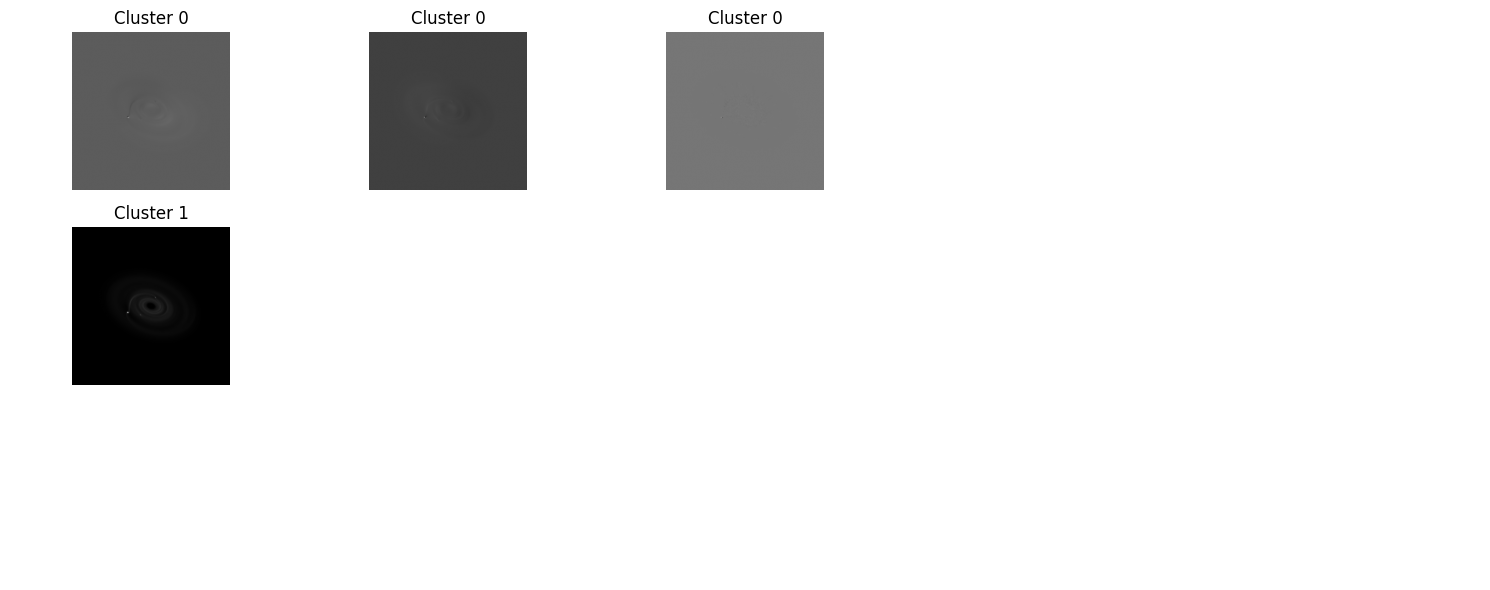

In [18]:
# Step 1: Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Flatten each image (600x600) into a 1D array so it can be fed into ML model
# This turns the list of 2D arrays into a 2D array of shape (num_images, image_width * image_height)
flattened_images = np.array([img.flatten() for img in image_data])

# Normalize the data using StandardScaler (scales pixel values)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(flattened_images)

# S Apply KMeans clustering to group similar disk images
# We start with 3 clusters, you can try other values too
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

# Visualize a few clustered examples
# Plot 5 images from each cluster
num_clusters = 3
fig, axes = plt.subplots(num_clusters, 5, figsize=(15, 6))

for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    for i in range(5):
        if i < len(cluster_indices):
            axes[cluster, i].imshow(image_data[cluster_indices[i]], cmap='gray')
            axes[cluster, i].axis('off')
            axes[cluster, i].set_title(f'Cluster {cluster}')
        else:
            axes[cluster, i].axis('off')

plt.tight_layout()
plt.show()

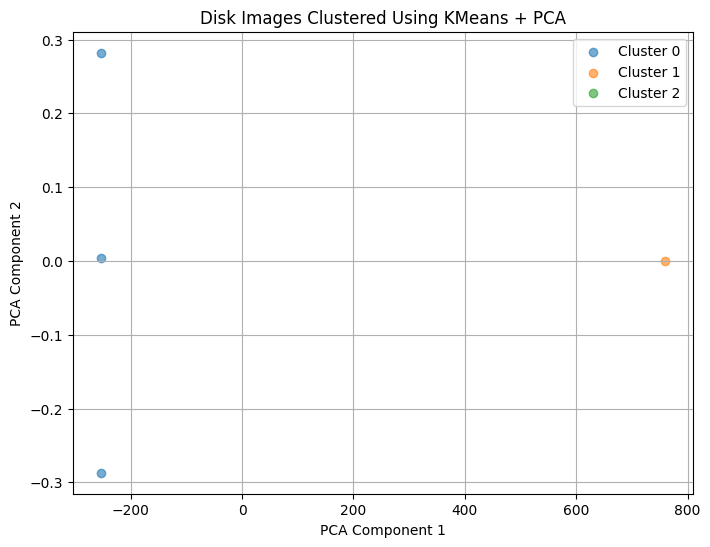

In [19]:
# Reduce dimensions to 2D for visualizing clusters
from sklearn.decomposition import PCA

# PCA to reduce high-dimensional image data to 2D
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(normalized_data)

#Plot the clusters in 2D space
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    indices = np.where(cluster_labels == cluster)
    plt.scatter(pca_components[indices, 0], pca_components[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title("Disk Images Clustered Using KMeans + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

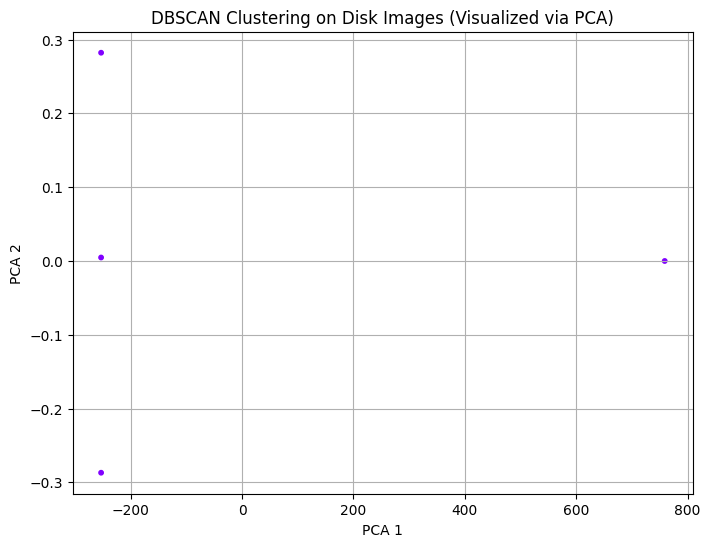

In [20]:
# DBSCAN for density-based clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5)
db_labels = dbscan.fit_predict(normalized_data)

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=db_labels, cmap='rainbow', s=10)
plt.title("DBSCAN Clustering on Disk Images (Visualized via PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [21]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')
print("KMeans model saved as 'kmeans_model.pkl'")

KMeans model saved as 'kmeans_model.pkl'


In [22]:
# Save the DBSCAN model
joblib.dump(dbscan, 'dbscan_model.pkl')
print("DBSCAN model saved as 'dbscan_model.pkl'")

DBSCAN model saved as 'dbscan_model.pkl'


In [23]:
# Load the KMeans model
kmeans_loaded = joblib.load('kmeans_model.pkl')

# Load the DBSCAN model
dbscan_loaded = joblib.load('dbscan_model.pkl')

# **REPORT :**

## **Project Title:**

***Exoplanet Atmosphere Characterization***

## **Objective:**
To analyze disk structures from FITS image data and group them into similar morphological categories using unsupervised learning.

## **Dataset:**
Images were in .fits format, containing potential protoplanetary disk observations.

Images were manually uploaded and preprocessed.

## **Steps Followed:**

1. **Data Loading:**

Read .fits files using astropy.io.fits.

Converted to NumPy arrays and resized to a uniform shape.

2. **Preprocessing:**

Normalized image pixel values to a 0–1 scale.

Flattened image arrays to form feature vectors for clustering.

3. **Unsupervised Learning:**

Applied KMeans and DBSCAN clustering.

Visualized results using PCA to reduce dimensions.

4. **Clustering Outcome:**

Found potential cluster groups based on disk similarity.

Identified anomalies or outliers from DBSCAN output.

5. **Model Saving:**

Trained models were saved for later use and deployment.